<a href="https://colab.research.google.com/github/avaduthi/Capstone-Project-Relational-Database/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING



# **Project Type**    - Unsupervised
# **Contribution**    - Team
# **Team Member 1 -**RAHUL VERMA
# **Team Member 2 -**SUMIT SHARMA
# **Team Member 3 -**ASHOK KUMAR
# **Team Member 4 -**VISHAL TOMAR

# **Project Summary -**

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers as of 2022-Q2. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

There were approximately 7787 records and 11 attributes in the dataset.

We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

Using a variety of methods, including the elbow method, silhouette score, dendrogram, and others, we constructed two distinct types of clusters with the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively, and determined the optimal number of clusters.

The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

# **GitHub Link -**https://github.com/avaduthi/Capstone-Project-Relational-Database/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb



# **Problem Statement**


# This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

#In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

#Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# *In this project, you are required to do



#Exploratory Data Analysis

#Understanding what type content is available in different countries

#Is Netflix has increasingly focusing on TV rather than movies in recent years.

# Clustering similar content by matching text-based features

# **Attribute Information**


#show_id : Unique ID for every Movie / Tv Show

#type : Identifier - A Movie or TV Show

#title : Title of the Movie / Tv Show

#director : Director of the Movie

#cast : Actors involved in the movie / show

#country : Country where the movie / show was produced

#date_added : Date it was added on Netflix

#release_year : Actual Releaseyear of the movie / show

#rating : TV Rating of the movie / show

#duration : Total Duration - in minutes or number of seasons

#listed_in : Genere

#description: The Summary description

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import AffinityPropagation

from sklearn.decomposition import PCA


from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
import nltk


# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

### Dataset Loading

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
initial_df =  pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
df = initial_df.copy()

### Dataset Rows & Columns count

In [ ]:
# head of the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#tail of the dataset
df.tail()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Information

In [ ]:
# Dataset  basic Info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# describing the dataset
df.describe(include = ['category', 'object']).transpose()

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [ ]:
# Droping the show_id column
df = df.drop(['show_id'], axis =1)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# checking missing values
df.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

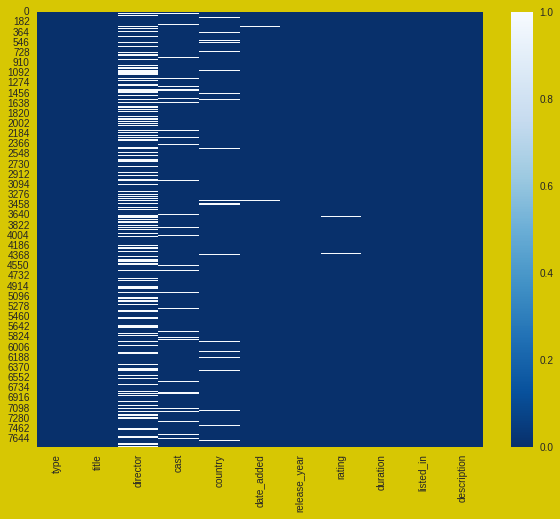

In [ ]:
# Visualizing the missing values
plt.figure(figsize = (10,8), facecolor = 'y')
ax = plt.gca()
sns.heatmap(df.isnull(), cmap = 'Blues_r', ax =ax,  linecolor = 'r')
plt.show()

### What did you know about your dataset?

Answer Here

In [ ]:
# dropping date_added and rating rows where values are missing
df = df.dropna(axis =0, subset = ['date_added', 'rating'] )
df['date_added'].isnull().sum()

0

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns


Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7770,7770,5394,7052,7265,7770,7770.000000,7770,7770,7770,7770
unique,2,7770,4047,6817,681,1563,NaN,14,216,491,7752
top,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,5372,1,18,18,2546,118,NaN,2861,1606,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013.935393,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.764357,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

# show_id : Unique ID for every Movie / Tv Show

# type : Identifier - A Movie or TV Show

# title : Title of the Movie / Tv Show

# director : Director of the Movie

# cast : Actors involved in the movie / show

# country : Country where the movie / show was produced

# date_added : Date it was added on Netflix

# release_year : Actual Releaseyear of the movie / show

# rating : TV Rating of the movie / show

# duration : Total Duration - in minutes or number of seasons

# listed_in : Genere

# description : The Summary description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in type is 2
No. of unique values in title is 7770
No. of unique values in director is 4047
No. of unique values in cast is 6817
No. of unique values in country is 681
No. of unique values in date_added is 1563
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 491
No. of unique values in description is 7752


## 3. ***Data Wrangling***

In [ ]:
# Summing null values
print('Missing Data Count')
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

Missing Data Count


director    2376
cast         718
country      505
dtype: int64

In [ ]:
print('Missing Data Percentage')
print(round(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)/len(df)*100,2))

Missing Data Percentage
director    30.58
cast         9.24
country      6.50
dtype: float64


In [ ]:
# The missing values in the 'director', 'cast', and 'country' columns can be replaced with the label 'Unknown'.
df[['director']] = df[['director']].fillna('Unknown')
df[['cast']]     = df[['cast']].fillna('Unknown')
df[['country'] ] = df[['country']].fillna('Unknown')

In [ ]:
df.dropna(subset=['date_added'], inplace=True)

### Data Wrangling Code

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# defining a function to get the year addedfrom the date_added
def func_1(x):
  return x.split()[0]

In [ ]:
# Define a function to extract the month from a date string
def func_1(date_str):
    try:
        return datetime.strptime(date_str, '%B %d, %Y').month
    except:
        return None

# Apply the function to the 'date_added' column to get the month added column
df['month_added'] = df['date_added'].apply(func_1)

# Extract the year from the 'date_added' column to get the year added column
df['year_added'] = df['date_added'].apply(lambda x: x.split()[-1] if isinstance(x, str) else None)

# Convert the release year column to a string
df['release_year'] = df['release_year'].astype(str)

# Drop the original 'date_added' column
df = df.drop('date_added', axis=1)


In [ ]:
# checking the head of the dataset
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,None,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,None,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",None,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",None,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,None,2020


In [ ]:
# defining two sub-datasets based on type of the content
shows_df = df[df['type'] == 'TV Show']
movie_df  = df[df['type']== 'Movie']


In [ ]:
# creating a column n movie_df dataframe using func_1 funtion
movie_df['duration'] = movie_df['duration'].apply(func_1)

In [ ]:
# head of movie_data
movie_df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,None,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,None,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,None,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",None,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,None,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",None,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,None,Dramas,A brilliant group of students become card-coun...,None,2020
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,None,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",None,2020


#### Chart - 1

# **Type distribution**

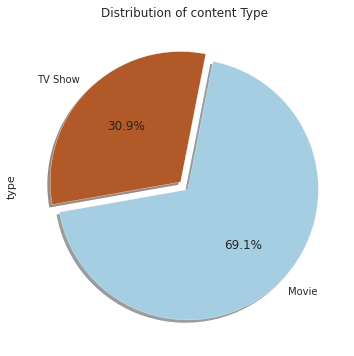

In [ ]:
# Chart - 1 visualization code
# plotting the type distribution
sns.set_style('darkgrid')


plt.figure(figsize = (8,6))
df['type'].value_counts().plot.pie(autopct="%1.1f%%", cmap = 'Paired', shadow=True, startangle=190,explode=(0.04,0.04));
plt.title('Distribution of content Type')
plt.show()


In [ ]:
# creating a  TV shows dataset where imputed values are not taking into account
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_df = tv_shows_df[tv_shows_df['country'] != 'missing']

# creating a  movies dataset where imputed values are not taking into account
movies_df  = df[df['type']== 'Movie']
movies_df = movies_df[movies_df['country'] != 'missing']


# getting unique values shows dataframe
country_df_shows = pd.DataFrame(tv_shows_df['country'].str.split(', ', expand= True).stack().reset_index(level =1, drop = True).value_counts()).reset_index()
country_df_shows.rename(columns = {'index': 'country', 0:'shows counts'}, inplace =True)
top_15_countries = country_df_shows.head(15)

# getting unique values shows dataframe fir movies
country_df_movies = pd.DataFrame(movies_df['country'].str.split(', ', expand= True).stack().reset_index(level =1, drop = True).value_counts()).reset_index()
country_df_movies.rename(columns = {'index': 'country', 0:'movies counts'}, inplace =True)
top_15_countries_movies = country_df_movies.head(15)
new_df = pd.concat([top_15_countries, top_15_countries_movies] , axis =1)

# final dataframe
new_df


,country,shows counts,country,movies counts
0,United States,860,United States,2427
1,Unknown,276,India,915
2,United Kingdom,255,United Kingdom,466
3,Japan,182,Canada,286
4,South Korea,157,France,265
5,Canada,126,Unknown,229
6,France,84,Spain,158
7,India,75,Germany,157
8,Taiwan,70,Japan,103
9,Australia,58,China,102


In [ ]:
# top 10 directors who have directed most move
director_df  =  df[df['director'] != 'None']
director_df = pd.DataFrame(director_df['director'].value_counts().head(10)).reset_index()
director_df.rename(columns = {'index' : 'director', 'director' : 'counts'}, inplace= True)
director_df



,director,counts
0,Unknown,2376
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Martin Scorsese,12
6,Youssef Chahine,12
7,Jay Chapman,12
8,Steven Spielberg,10
9,David Dhawan,9


##### 1. Why did you pick the specific chart?

A pie chart, is a way of summarizing a set of nominal data or displaying the different values of a given variable.This type of chart is a circle divided into a series of segments. Each segment represents a particular category.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above pie chart is that tv shows has 39.15 and movies has 69.1% in the type distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

# **Seasons**

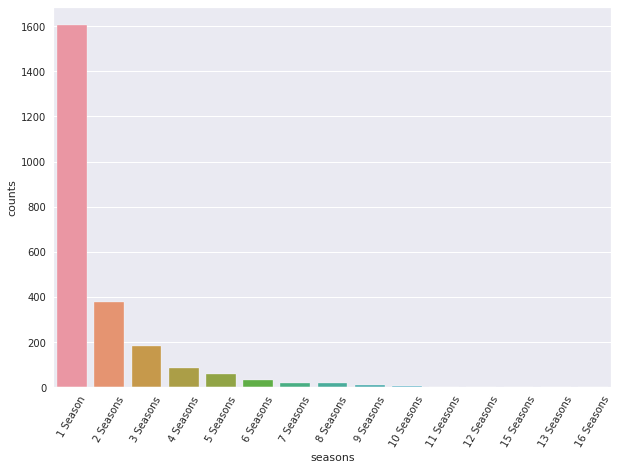

,seasons,counts
0,1 Season,1606
1,2 Seasons,378
2,3 Seasons,183
3,4 Seasons,86
4,5 Seasons,57
5,6 Seasons,30
6,7 Seasons,19
7,8 Seasons,18
8,9 Seasons,8
9,10 Seasons,5


In [ ]:
# Chart - 2 visualization code
# plotting seasons distribution for TV shows

plt.figure(figsize = (10,7))


seasons_df = pd.DataFrame(shows_df['duration'].value_counts()).reset_index()
seasons_df.rename(columns = {'index': 'seasons', 'duration': 'counts'}, inplace = True)
sns.barplot(data =seasons_df, x= 'seasons', y= 'counts')
plt.xticks(rotation = 60)
plt.show()


seasons_df

##### 1. Why did you pick the specific chart?

A bar graph is the representation of numerical data by rectangles (or bars) of equal width and varying height. The gap between one bar and another should be uniform throughout. It can be either horizontal or vertical. The height or length of each bar relates directly to its value.

##### 2. What is/are the insight(s) found from the chart?


The above graph depicts seasons of TV shows signed vs the movies signed
This distinction gives contacts as TV shows require recurring investment for each seasons. So the TV numbers have been increased in accordance to the seasons. As they were considered as one entity earlier
We can observe that TV shows signed have been higher than movies in 2016. While the the movies signed have been higher, it is blatantly visible that the TV shows signed per year is catching up to the movies signed by the year




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

# **Duration: ⌛**


In [ ]:
# Chart - 3 visualization code
# Create subsets for tv shows and movies.
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

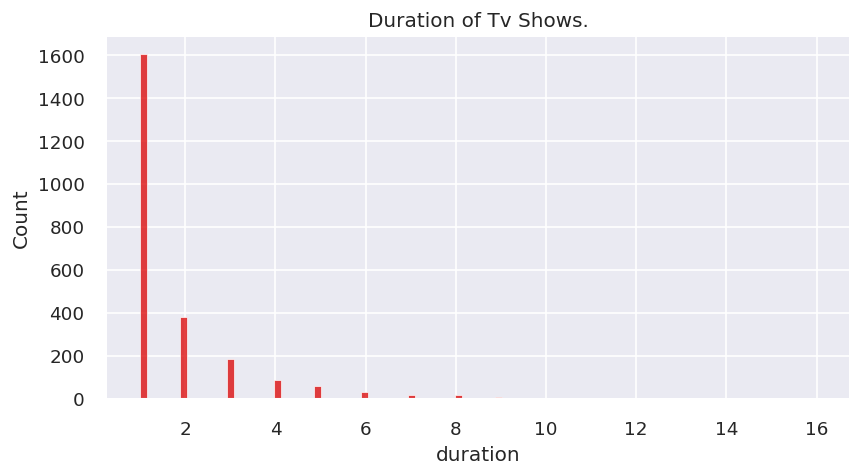

In [ ]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000')
plt.title('Duration of Tv Shows.')
plt.show()


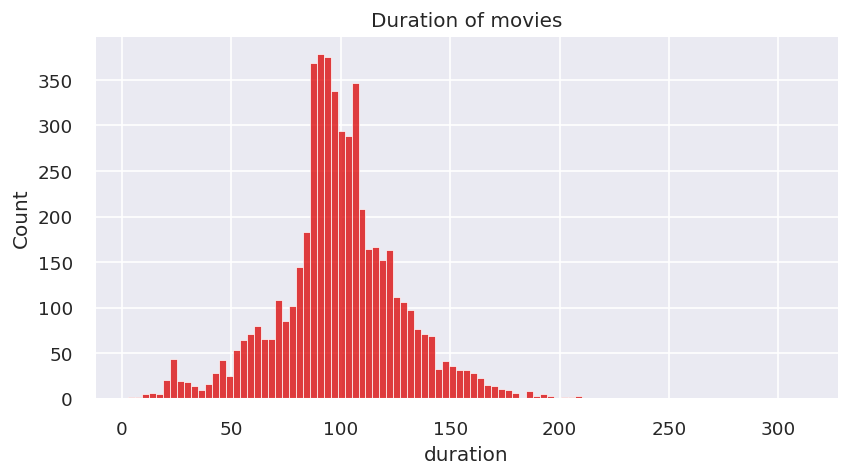

In [ ]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis. The vertical y-axis represents the number count or percentage of occurrences in the data for each column. Columns can be used to visualize patterns of data distributions.

##### 2. What is/are the insight(s) found from the chart?

Most movies on Netflix have a duration range from 90 to 110 minutes
Most TV shows on Netflix have a span of 1 season only

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

# **Rating: ⭐⭐⭐**

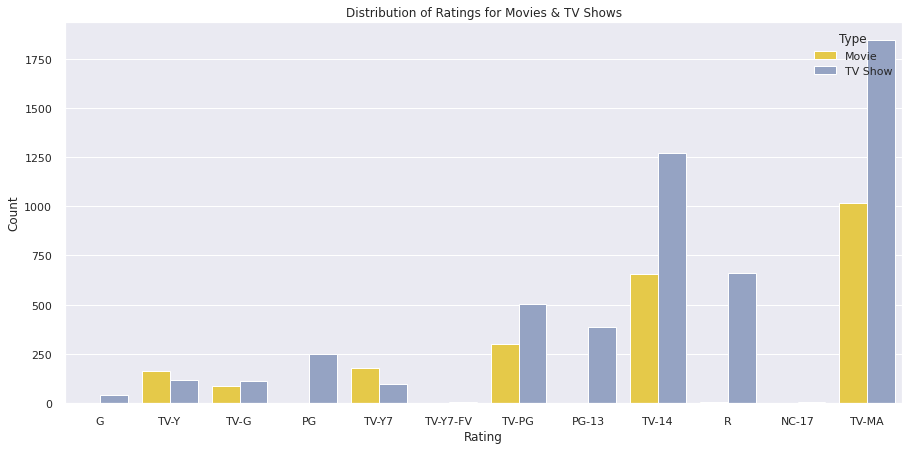

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assumption: df is a Pandas DataFrame with columns "rating" and "type"

# Define the order of the ratings for the x-axis
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

# Create a bar plot with the counts of each rating, colored by type (movies or TV shows)
plt.figure(figsize=(15, 7))
sns.countplot(x='rating', hue='type', order=order, palette='Set2_r', data=df)

# Add a title and axis labels
plt.title("Distribution of Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")

# Add a legend to explain the colors
plt.legend(title='Type', loc='upper right', labels=['Movie', 'TV Show'])

# Show the plot
plt.show()


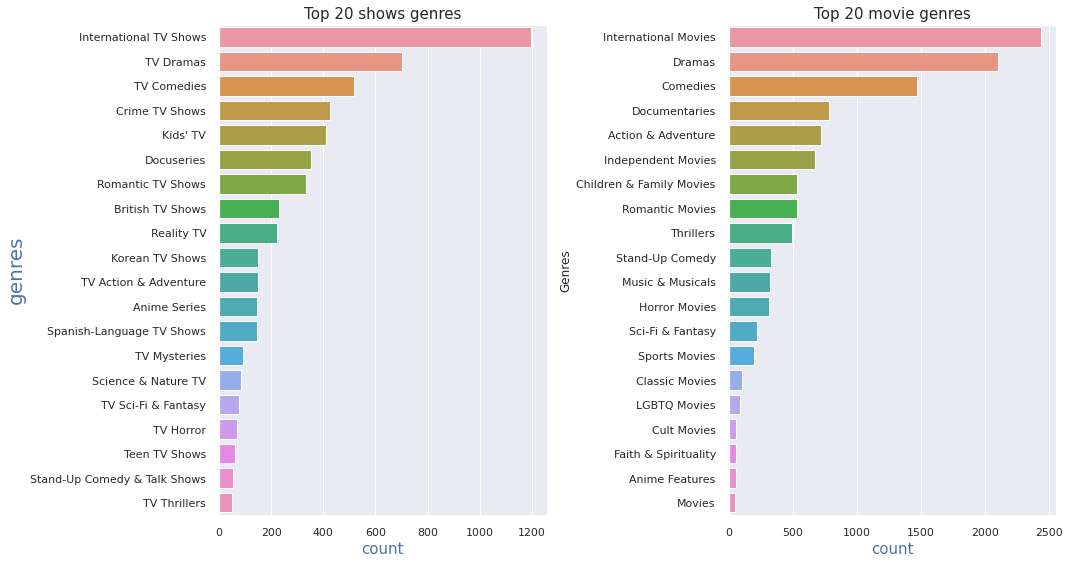

In [ ]:
# finding top 20 movie genres in movies and TV shows
genres_shows = shows_df.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_movies = movie_df.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)


fig , axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(y = genres_shows, order=genres_shows.value_counts().index[:20], ax= axes[0])
sns.countplot(y = genres_movies, order=genres_movies.value_counts().index[:20], ax= axes[1])

axes[0].set_xlabel('count', fontsize = 15, c='b')
axes[1].set_xlabel('count', fontsize = 15, c='b')
axes[0].set_ylabel('genres', fontsize = 20, c = 'b')
axes[0].set_title('Top 20 shows genres', fontsize = 15)
axes[1].set_title('Top 20 movie genres', fontsize = 15 )




# plt.figure(figsize=(7,9))
# g = sns.countplot(y = genres_shows, order=genres_shows.value_counts().index[:20])

# plt.xlabel('Titles')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable. It uses the concept of a bar chart for the visual depiction.




##### 2. What is/are the insight(s) found from the chart?

Most content on Netflix is rated for Mature Audiences and over 14 years old

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

# **Actors**

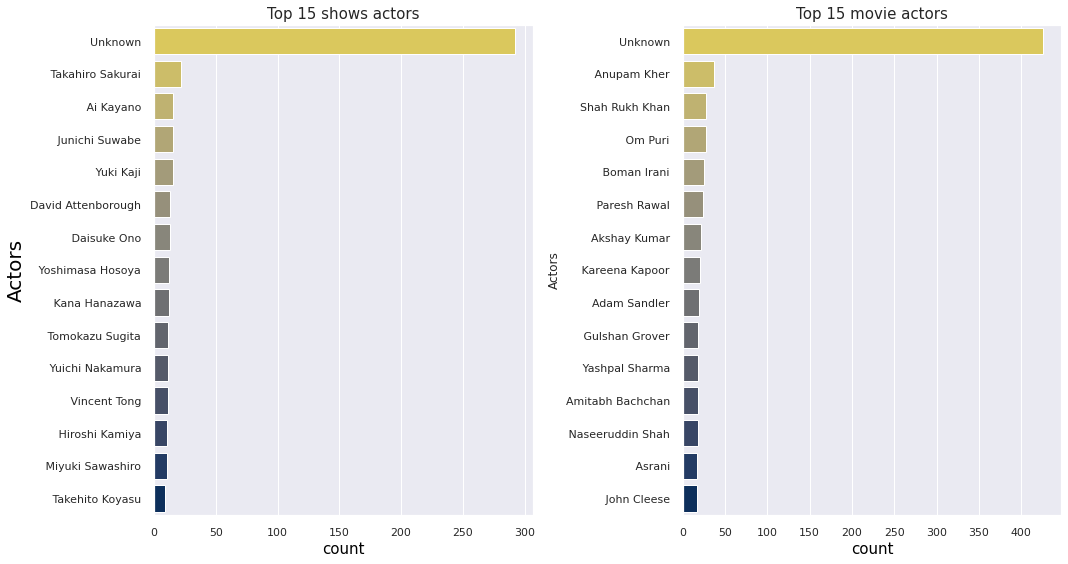

In [ ]:
# Chart - 5 visualization code
# finding the top actors who worked in most content in movies and TV shows
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_actors = tv_shows_df[tv_shows_df['cast'] != 'not available']

movies_df  = df[df['type']== 'Movie']
movie_actors = movies_df[movies_df['cast'] != 'not available']




top_shows_actors =  tv_shows_actors.cast.str.split(',', expand= True).stack().reset_index(level =1, drop = True)
top_movie_actors =  movie_actors.cast.str.split(',', expand= True).stack().reset_index(level =1, drop = True)



fig , axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(y = top_shows_actors, order=top_shows_actors.value_counts().index[:15], ax= axes[0], palette ='cividis_r')
sns.countplot(y = top_movie_actors, order=top_movie_actors.value_counts().index[:15], ax= axes[1], palette = 'cividis_r')

axes[0].set_xlabel('count', fontsize = 15, c='black')
axes[1].set_xlabel('count', fontsize = 15, c='black')
axes[0].set_ylabel('Actors', fontsize = 20, c = 'black')
axes[0].set_title('Top 15 shows actors', fontsize = 15)
axes[1].set_title('Top 15 movie actors', fontsize = 15 )

plt.ylabel('Actors')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Top Actors on Netflix are:

1.Anupam Kher
2.Shah Rukh Khan 3.Naseeruddin Shah 4.Om Puri 5.Akshay Kumar

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

# **Most used word in title of content on Netflix**

In [ ]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 144692 words in the combination of all titles.


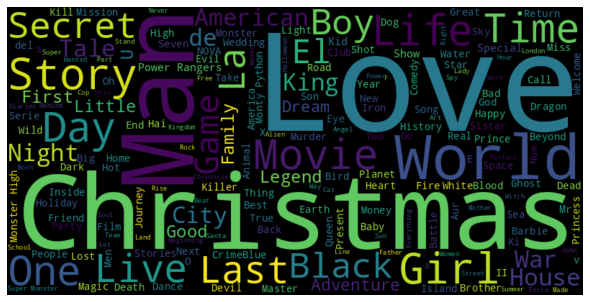

In [ ]:
# Chart - 6 visualization code
#chcking word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (14,6)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

# **Cast: 🎭**

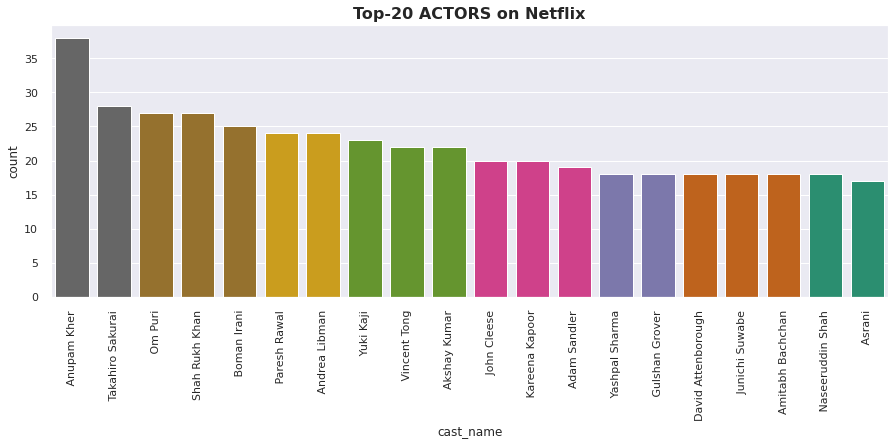

In [ ]:
# Chart - 7 visualization code

df['cast_name'] = df['cast'].apply(lambda x :  x.split(','))
cast_count = []
for i in df['cast_name']: cast_count += i

cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2_r")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

# **Director: 🤠**

Text(0.5, 1.0, 'Top 10 movie directors')

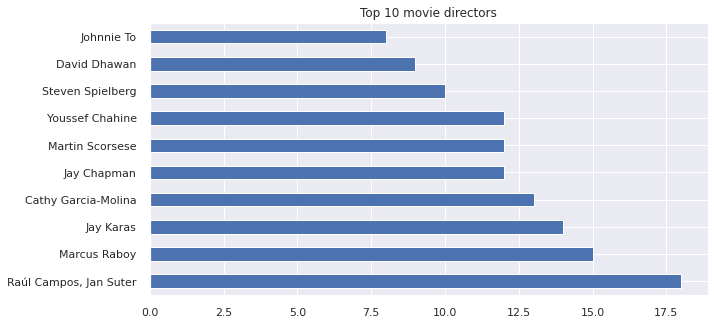

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

Text(0.5, 1.0, 'Top 10 TV show directors')

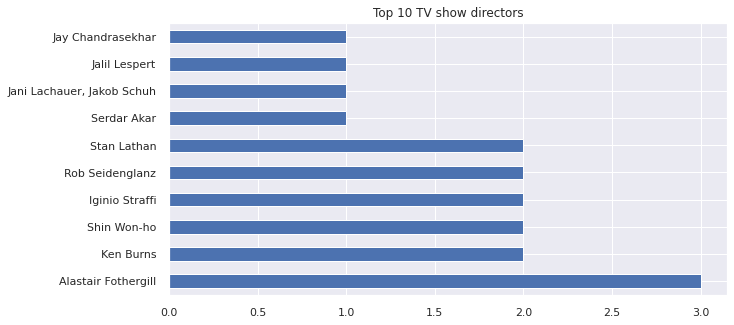

In [ ]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Top Directors on Netflix are:

1.Jan Suter
2.Raul Campos 3.Marcus Raboy 4.Jay Karas 5.Cathy Garcia-Molina

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

# **Release_year : Actual Releaseyear of the movie / show**


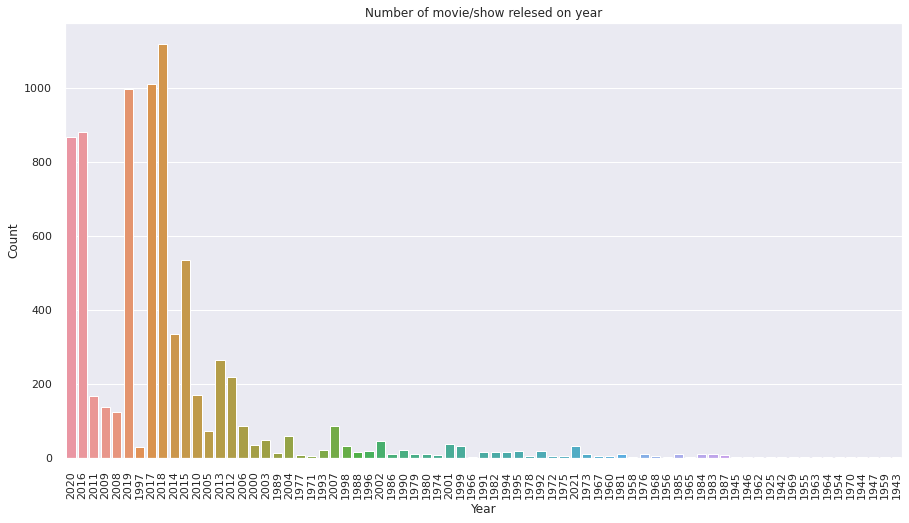

In [ ]:
# Chart - 9 visualization code

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="release_year", data=df)
plt.title("Number of movie/show relesed on year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation =90)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The above graph depicts an estimation of seasonal TV show and Movie release date per each year. We make a general assumption that each show releases a season yearly which is often the case for most TV shows.
There are certainly exemptions. Eg. Ozark was released in years 2017, 2018, 2020 and 2022. [ P.S: Brilliant slow burn. Do check it out! ]
We can observe that TV releases outnumbering movies from 2010. It is a known fact that each show contains multiple episodes, hence we can confidently say that significant amount of video content is being enlisted under TV shows from 2010
Years 2019, 2020 and 2021 see multi-episode TV seasons outnumbering movies signed per year

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

# **country : Country where the movie / show was produced**

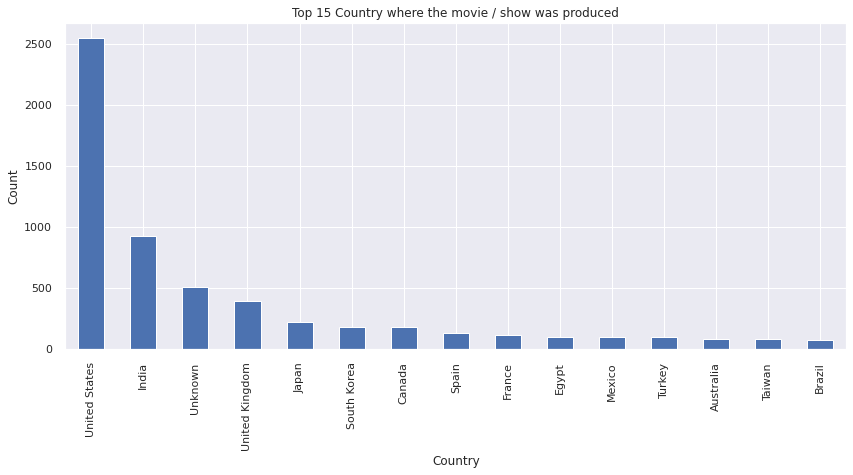

In [ ]:
# Chart - 10 visualization code
#top 15 country where the movie/shows was produced
df["country"].value_counts()[:15].sort_values(ascending=False).plot(kind="bar")
plt.title("Top 15 Country where the movie / show was produced")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Drama is the most produced genre in a lot of Non-English speaking countries
Comedy is the most produced genre in English speaking countries like United States of America and United Kingdom and Canada
Drama and Comedy are the most produced genres in the top countries with exceptions of Japan and South Korea
Japan is the biggest producer of Anime. Anime is also the most produced in genre in Japan
Most South Korean content are from the Romance genre*
Documentaries are mainly produced in United Kingdom and United States of America

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

# **listed_in : Genere**

Text(0.5, 1.0, 'Top 10 genres')

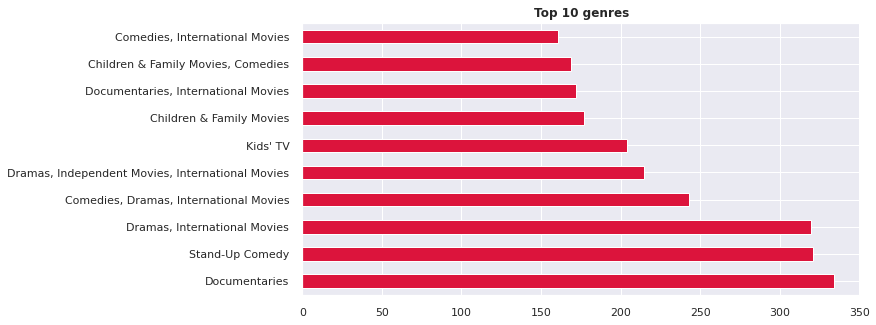

In [ ]:
# Chart - 11 visualization code
# TOP 10 GENRES
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh', color= 'crimson')
plt.title('Top 10 genres', fontweight = 'bold')
#sns.countplot(palette = 'cubehelix')

In [ ]:
# SHARE TOP 3 GENRES
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

12.548262548262548

In [ ]:
# SHARE TOP 10 GENRES
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

29.806949806949806

The dramas is the most popular genre followed by comedies and documentaries.

These three genres account for about 12% of all movies and TV shows.

This value increases to about 29% for top 10 genres.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Top Genres in Netflix are:

1.Drama
2.Comedy 3.Documentary 4.Action and Adventure 5.Romance

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# **5. Hypothesis Testing**

# 1.HYPOTHESIS TESTING

# HO:movies rated for kids and older kids are at least two hours long.
# H1:movies rated for kids and older kids are not at least two hours long.

In [ ]:
movies

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,None,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",None,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",None,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,None,2020
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",None,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",None,2020
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,None,2020
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,None,2019
7784,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",None,2020


In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,cast_name
0,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,None,2020,"[João Miguel, Bianca Comparato, Michel Gomes..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,None,2016,"[Demián Bichir, Héctor Bonilla, Oscar Serran..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",None,2018,"[Tedd Chan, Stella Chung, Henley Hii, Lawre..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",None,2017,"[Elijah Wood, John C. Reilly, Jennifer Conne..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,None,2020,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ..."


In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,cast_name,target_ages
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,None,2016,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",None,2018,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",None,2017,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens


In [ ]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group


,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

# **2. HYPOTHESIS TESTING**
# H1:The duration which is more than 90 mins are movies
# HO:The duration which is more than 90 mins are NOT movies

In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,cast_name
0,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,None,2020,"[João Miguel, Bianca Comparato, Michel Gomes..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,None,2016,"[Demián Bichir, Héctor Bonilla, Oscar Serran..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",None,2018,"[Tedd Chan, Stella Chung, Henley Hii, Lawre..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",None,2017,"[Elijah Wood, John C. Reilly, Jennifer Conne..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,None,2020,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ..."


In [ ]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_

In [ ]:
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,cast_name
0,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,None,2020,"[João Miguel, Bianca Comparato, Michel Gomes..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,None,2016,"[Demián Bichir, Héctor Bonilla, Oscar Serran..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",None,2018,"[Tedd Chan, Stella Chung, Henley Hii, Lawre..."


In [ ]:
#group_by duration and TYPE
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group


,type,duration
0,Movie,99.330417
1,TV Show,1.761468


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.330417
dtype: float64
Std  duration    1.561099
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5372 2398
dof 7768
SP_2 = duration    252.749896
dtype: float64
SP duration    15.89811
dtype: float64
tvalue 249.88962005047787


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9602694215408423

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602694215408418

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
print(df.isnull().sum())

type               0
title              0
director           0
cast               0
country            0
release_year       0
rating             0
duration           0
listed_in          0
description        0
month_added     7770
year_added         0
cast_name          0
dtype: int64


# The "empty string" can be used to replace the missing values in the director, cast, and country attributes.
# There is a small percentage of null values in the rating and date_added columns; eliminating these nan values will have little effect on the model's construction. As a result, the nan value in the rating and date_added columns is simply removed.

### 2. Handling Outliers

<Axes: >

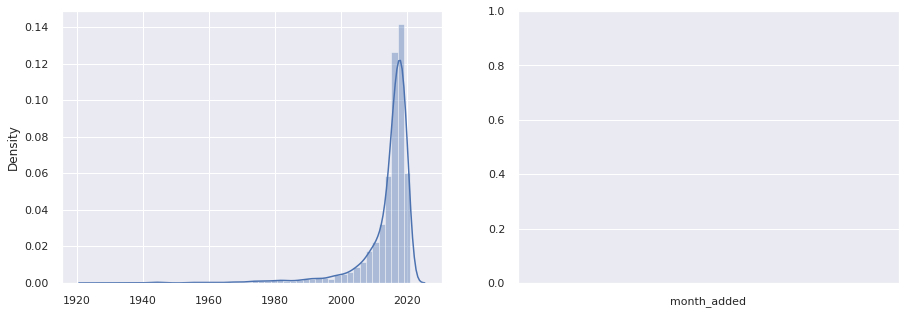

In [ ]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=df['release_year'], ax=ax[0])
sns.boxplot(data=df, ax=ax[1])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.NOT NEEDED

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
df['description'].astype(str)
# after above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))


#### 2. Lower Casing

In [ ]:
# Lower Case
df['description']= df['description'].apply(lambda x: x.lower())


#### 3. Removing Punctuations

Removing punctuation is the process of removing any punctuation marks (e.g., periods, commas, exclamation points, etc.) from text data. This is a common pre-processing step in natural language processing (NLP) tasks and text analysis, as punctuation marks often do not carry much meaning and can add noise to the data. Removing punctuation can also make it easier to tokenize text into words or sentences, as punctuation marks often act as delimiters between words or sentences. Additionally, removing punctuation can also help in reducing the size of the vocabulary, which can make it easier to work with larger texts or texts in languages with a high number of inflected forms. It can be done using python libraries such as string, re, and nltk.

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [ ]:
df['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0:10]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
5    genetics professor experiments treatment comat...
6    awful accident couple admitted grisly hospital...
7    one high school students attacks dedicated tea...
8    doctor goes missing psychiatrist wife treats b...
9    architect wife move castle slated become luxur...
Name: description, dtype: object

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
nltk.download('punkt')
def tokenizer(txt):
  tokens = word_tokenize(txt)

  return tokens
df['Processed Description'] = df['description'].apply(tokenizer)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
ps = PorterStemmer()

def stem_text(text):
  stemmed = []
  for word in text:
    stemmed.append(ps.stem(word))
  return stemmed


df['Processed Description'] = df['Processed Description'] .apply(lambda x : stem_text(x))



##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

#### 10. TfidVectorizer

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7770, 5000)

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray()

##### Which text vectorization technique have you used and why?

Text vectorization is the process of converting text data into numerical vectors or feature representations that can be used for machine learning or data analysis tasks. In simple terms, it transforms the text data into numerical data which can be easily processed by machine learning algorithms. There are several text vectorization techniques available such as bag of words, Tf-idf, Word2vec, and GloVe etc.

We will be using the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency
TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document). The more often a word appears in a document, the higher its TF score.
IDF(t) = IDF measures how rare a word is across all the documents in the corpus. The rarer a word, the higher its IDF score.
The product of TF and IDF is used to calculate the overall weight of a word in a document, which is known as the TF-IDF score. Words with high TF-IDF scores are considered to be more important and relevant to the document than words with low TF-IDF scores.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


NOT NEEDED

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

NOT NEEDED

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

NOT NEEDED

### 6. Data Scaling

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

 Answer Here.YES
 As the number of features (words in this case) is high, it is useful to apply dimensionality reduction to simplify the dataset and improve computational efficiency.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

NOT NEEDED

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.NOT NEEDED

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
from tabulate import tabulate
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_model(model, X, y_predict):
    """
    Evaluate a clustering model and print the results.
    & Returns
    Model evaluation result
    """
    # Calculate the number of clusters and evaluation metrics
    n_clusters = len(set(y_predict))
    S_score = silhouette_score(X, y_predict)
    CH_score = calinski_harabasz_score(X, y_predict)
    DB_score = davies_bouldin_score(X, y_predict)

    # Print the evaluation results
    print(f"Number of clusters: {n_clusters}")
    print(f"Silhouette score: {S_score:.4f}")
    print(f"Calinski-Harabasz score: {CH_score:.4f}")
    print(f"Davies-Bouldin score: {DB_score:.4f}")

    # Create a dictionary to store the evaluation scores
    scores_dict = {"silhouette_score": S_score,
                   "calinski_harabasz_score": CH_score,
                   "davies_bouldin_score": DB_score}

    # Create a dataframe to display the evaluation results
    df_eval = pd.DataFrame({"Evaluation Metric": ["Silhouette Score",
                                                  "Calinski-Harabasz Score",
                                                  "Davies-Bouldin Score"],
                                     "Score": [S_score, CH_score, DB_score]})

    # Print the dataframe
    print(tabulate(df_eval, headers="keys", tablefmt="grid"))

    # Return the evaluation results
    return {"n_clusters": n_clusters,
            "silhouette_score": S_score,
            "calinski_harabasz_score": CH_score,
            "davies_bouldin_score": DB_score}

def plot_clustering_scores(scores_dict):
    """
    Plot the clustering evaluation scores using a bar chart.
    """
    # Extract the scores from the dictionary
    scores = [scores_dict["silhouette_score"], scores_dict["calinski_harabasz_score"], scores_dict["davies_bouldin_score"]]
    labels = ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]

    # Plot the scores as a bar chart
    fig, ax = plt.subplots()
    ax.bar(labels, scores, color=["tab:blue", "tab:orange", "tab:green"])

    # Add labels and titles
    ax.set_xlabel("Evaluation Metric")
    ax.set_ylabel("Score")
    ax.set_title("Clustering Evaluation Scores")

    # Set the y-axis limits to the range of the scores
    ax.set_ylim([np.min(scores) - 0.1, np.max(scores) + 0.1])

    # Display the plot
    plt.show()


# **ML Model - 1 K-Means Clustering**

In [ ]:
# Just guessing and checking by k=3

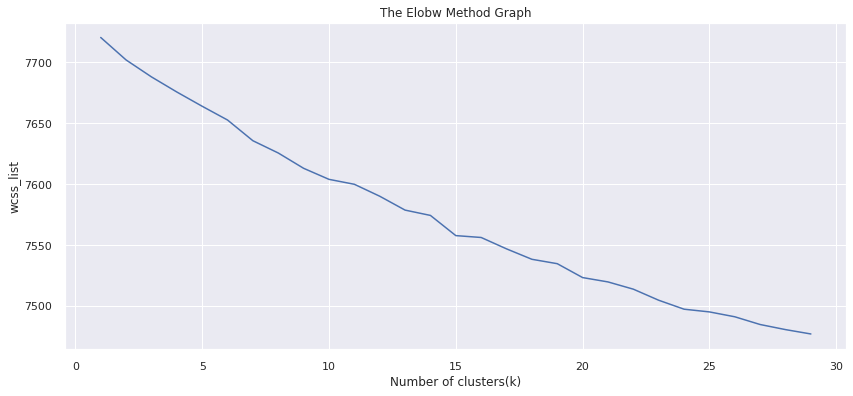

In [ ]:
# ML Model - 1 Implementation
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))


cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0016
cluster: 4 	 Sillhoute: 0.0021
cluster: 5 	 Sillhoute: 0.0025
cluster: 6 	 Sillhoute: 0.0034
cluster: 7 	 Sillhoute: 0.0037
cluster: 8 	 Sillhoute: 0.0038
cluster: 9 	 Sillhoute: 0.0042
cluster: 10 	 Sillhoute: 0.0045
cluster: 11 	 Sillhoute: 0.0046
cluster: 12 	 Sillhoute: 0.0048
cluster: 13 	 Sillhoute: 0.0051
cluster: 14 	 Sillhoute: 0.0056
cluster: 15 	 Sillhoute: 0.0061
cluster: 16 	 Sillhoute: 0.0063
cluster: 17 	 Sillhoute: 0.0064
cluster: 18 	 Sillhoute: 0.0062
cluster: 19 	 Sillhoute: 0.0063
cluster: 20 	 Sillhoute: 0.0069
cluster: 21 	 Sillhoute: 0.0067
cluster: 22 	 Sillhoute: 0.0069
cluster: 23 	 Sillhoute: 0.0068
cluster: 24 	 Sillhoute: 0.0072
cluster: 25 	 Sillhoute: 0.0073
cluster: 26 	 Sillhoute: 0.0071
cluster: 27 	 Sillhoute: 0.0074
cluster: 28 	 Sillhoute: 0.0074
cluster: 29 	 Sillhoute: 0.0072


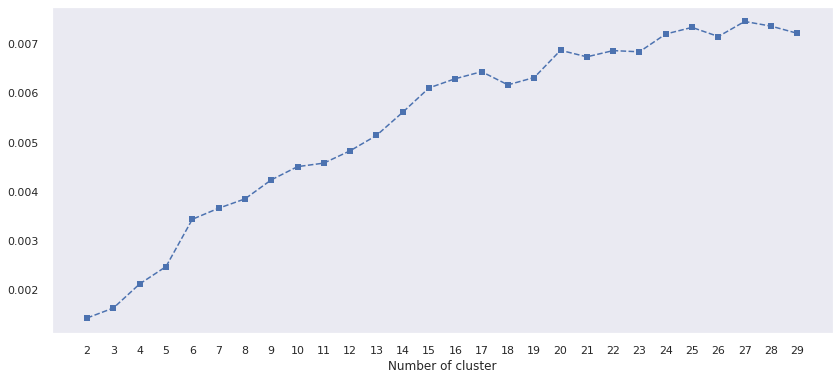

In [ ]:
#Plotting Sillhoute's score
plt.plot(sill,'bs--')
plt.xticks(list(range(0,28)),list(range(2,30)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()


In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar propert

Implementing K-means clustering and calculating the Silhouette scores for clusters of 2 to 30 for content based on Release Year, Ratings, Type and Duration

A silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect. The silhouette plots can be used to select the most optimal value of the K

# **Evaluation**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007218341785521539


In [ ]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)


9.193799997853855

In [ ]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict
df['cluster'].value_counts()


3     2504
2      532
11     331
5      319
18     289
14     284
1      271
7      268
23     234
12     232
10     224
17     223
16     209
8      205
19     192
15     189
21     175
4      158
0      155
24     150
22     140
9      138
20     108
25      89
13      79
6       72
Name: cluster, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

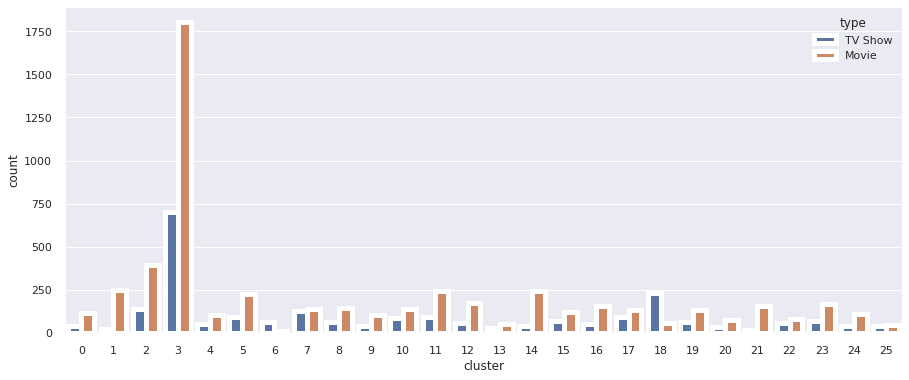

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)


# **Dendogram**

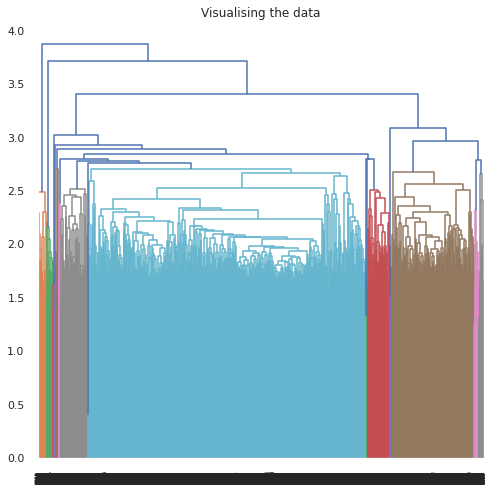

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

# **ML Model - 2 Hierarchical clustring**

In [ ]:
# Determine the optimal number of clusters


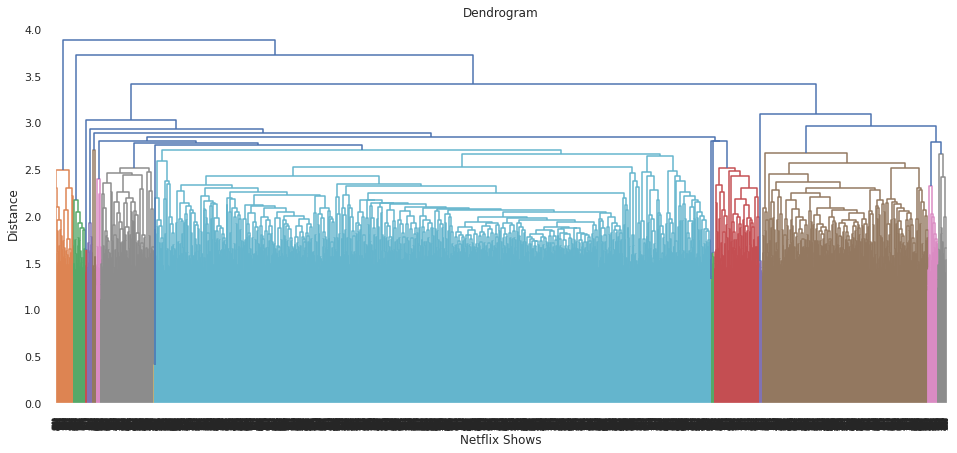

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(16, 7))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 5, color='r', linestyle='--')
plt.show()

We can see that Horizontal line cutting 5 branches. So we will choose number of clusters as 5.

# **AgglomerativeClustering**

In [ ]:

# ML Model - 2  Implementation
# Initialize the hierarchical model with the chosen number of clusters
hierarchical_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hierarchical = hierarchical_model.fit_predict(X)# Fit and predict on the model
hierarchical_labels = hierarchical_model.labels_  # Get the cluster labels for each point in the data
unique_labels_h = np.unique(hierarchical_labels)  # Get the unique cluster labels
silhouette_avg = silhouette_score(X, hierarchical_labels)   # Calculate the silhouette score
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : -0.0009562151428522755


In [ ]:
df['hierarchical_cluster'] = hierarchical_labels


# **Evaluation**

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
scores_dict_hierarchical = evaluate_clustering_model(hierarchical_model, X, y_hierarchical)


Number of clusters: 5
Silhouette score: -0.0010
Calinski-Harabasz score: 6.3067
Davies-Bouldin score: 16.0374
+----+-------------------------+--------------+
|    | Evaluation Metric       |        Score |
+====+=========================+==============+
|  0 | Silhouette Score        | -0.000956215 |
+----+-------------------------+--------------+
|  1 | Calinski-Harabasz Score |  6.30668     |
+----+-------------------------+--------------+
|  2 | Davies-Bouldin Score    | 16.0374      |
+----+-------------------------+--------------+


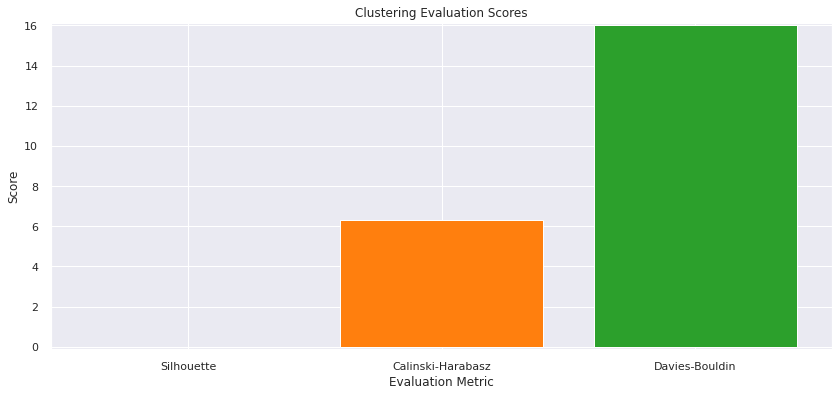

In [ ]:
plot_clustering_scores(scores_dict_hierarchical)


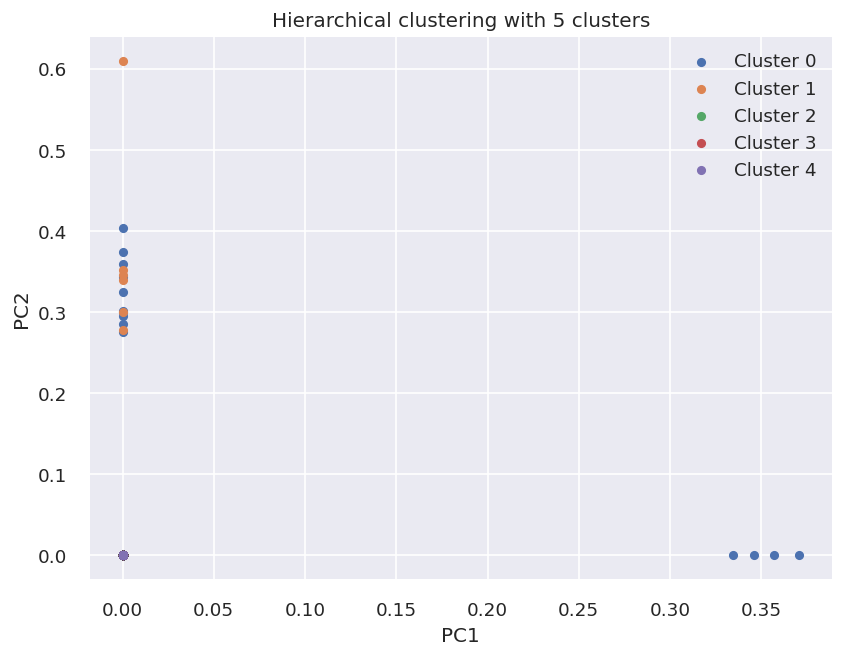

In [ ]:

# Create a scatter plot of the data colored by cluster label
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels_h:
    plt.scatter(X[hierarchical_labels == i, 0], X[hierarchical_labels == i, 1], s=20, label='Cluster {}'.format(i))
#plt.scatter(hierarchical_model.cluster_centers_[:, 0], hierarchical_model.cluster_centers_[:, 1], s=100, marker='x', c='black')
plt.title('Hierarchical clustering with {} clusters'.format(len(unique_labels_h)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
from wordcloud import STOPWORDS

STOPWORDS.update(['movie', 'show', 'series', 'film', 'watch', 'watching']) # Add custom stopwords


In [ ]:
def hierarchical_wordcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df[['hierarchical_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Return the word cloud object
  return wordcloud


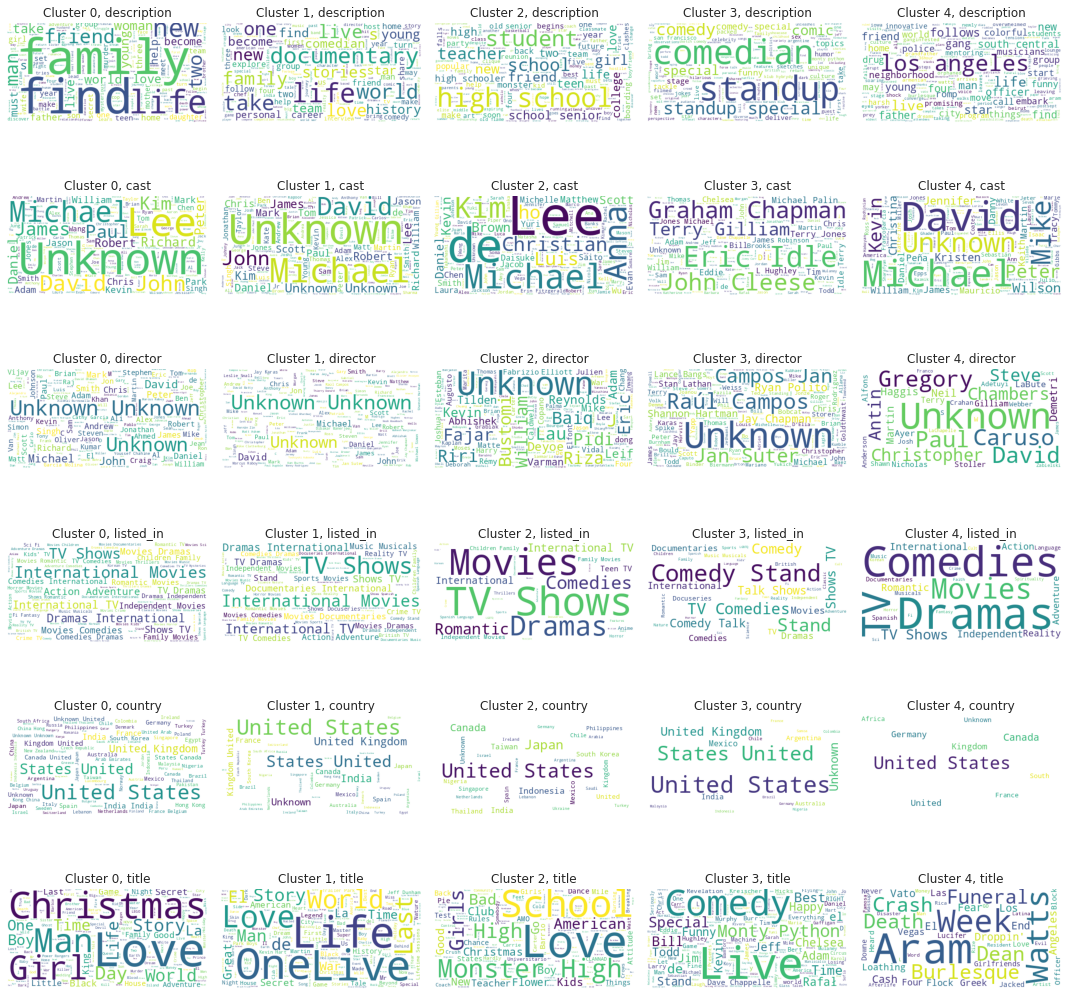

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))

for i in range(5):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(hierarchical_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')

plt.tight_layout()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

# **ML Model - 3  DBSCAN Clustering**

In [ ]:
# ML Model - 4 Implementation
# Create an instance of DBSCAN with specified hyperparameters
dbscan_model = DBSCAN(eps=0.7, min_samples=3)
dbscan_model.fit(X) # Fit the model to the input data
y_dbscan = dbscan_model.labels_ # Get the predicted cluster labels for the input data
dbscan_labels = dbscan_model.labels_
unique_labels_dbscan = np.unique(dbscan_labels)
print(y_dbscan)   # Print the predicted labels

[-1 -1 -1 ... -1 -1 -1]


In [ ]:
df['dbscan_cluster'] = dbscan_labels

# **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
scores_dict_dbscan = evaluate_clustering_model(dbscan_model, X, y_dbscan)


Number of clusters: 7
Silhouette score: -0.0091
Calinski-Harabasz score: 3.1013
Davies-Bouldin score: 1.1350
+----+-------------------------+-------------+
|    | Evaluation Metric       |       Score |
+====+=========================+=============+
|  0 | Silhouette Score        | -0.00905015 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz Score |  3.10133    |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin Score    |  1.13505    |
+----+-------------------------+-------------+


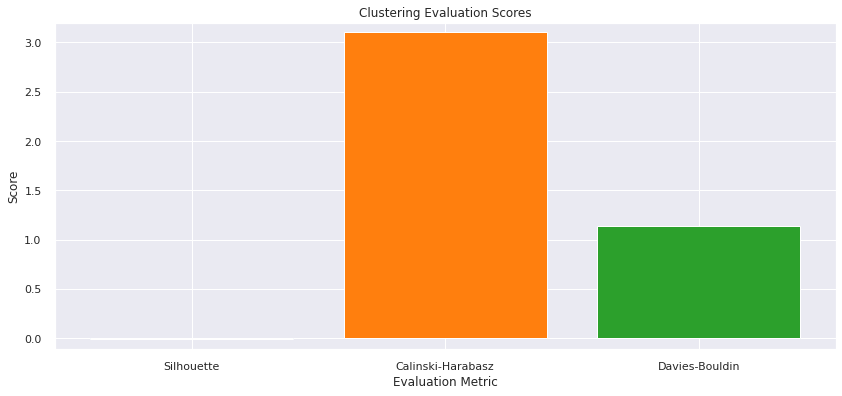

In [ ]:
plot_clustering_scores(scores_dict_dbscan)


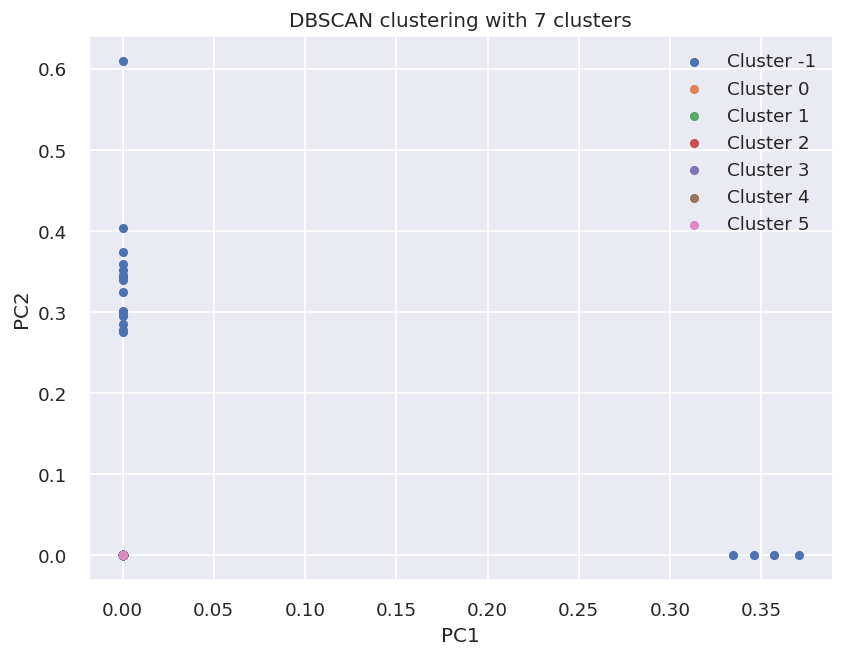

In [ ]:
# Create a scatter plot of the data colored by cluster label
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels_dbscan:
    plt.scatter(X[dbscan_labels == i, 0], X[dbscan_labels == i, 1], s=20, label='Cluster {}'.format(i))
plt.title('DBSCAN clustering with {} clusters'.format(len(unique_labels_dbscan)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
def dbscan_wordcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df[['dbscan_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['dbscan_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Return the word cloud object
  return wordcloud

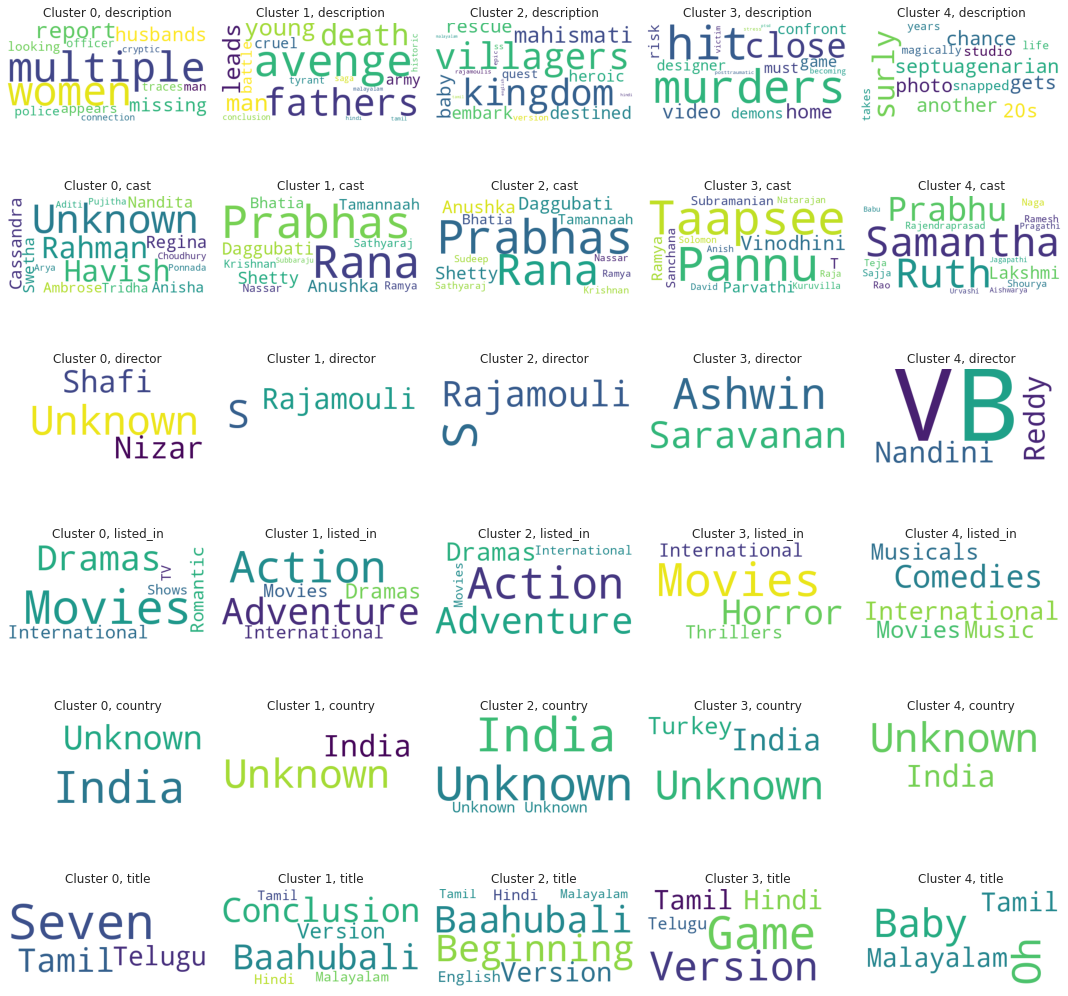

In [ ]:

fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))

for i in range(5):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(dbscan_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')

plt.tight_layout()
plt.show()


# 1. Which Evaluation metrics did you consider for a positive business impact and why?
# 1) Silhouette score

# Silhouette score is a popular evaluation metric for clustering algorithms. It measures how well each data point fits into its assigned cluster compared to other clusters. The score ranges from -1 to 1, with a higher score indicating better-defined clusters.

# Silhouette score is a useful metric for a positive business impact because it can help identify the optimal number of clusters for a dataset. This, in turn, can help companies make data-driven decisions and allocate resources more efficiently based on the distinct patterns and characteristics of each cluster.

# 2) Calinski-Harabasz score

# The Calinski-Harabasz score, also known as the variance ratio criterion, is a measure of the ratio between the within-cluster dispersion and the between-cluster dispersion. It is calculated by taking the ratio of the sum of squares between groups to the sum of squares within groups, multiplied by the ratio of the number of observations to the number of clusters minus one.

# In other words, the Calinski-Harabasz score measures how well separated the clusters are in the data and how compact the clusters are internally. A higher score indicates that the clusters are well separated and compact, while a lower score indicates that the clusters are not well separated or are not compact.

# 3) Davies-Bouldin score

# The Davies-Bouldin score is a measure of the average similarity between each cluster and its most similar cluster, compared to the average dissimilarity between each cluster and its least similar cluster. It is calculated by taking the sum of the ratios of the within-cluster scatter and the between-cluster distances, divided by the number of clusters.

# In other words, the Davies-Bouldin score measures how well separated the clusters are in the data and how distinct they are from each other. A lower score indicates that the clusters are well separated and distinct, while a higher score indicates that the clusters are not well separated or are not distinct from each other.

# **2. Which ML model did you choose from the above created models as your final prediction model and why?**

In [ ]:
# Storing metrics in order to make dataframe of metrics
Model          = ['K-Means Clustering', 'Hierarchical Clustering', 'DBSCAN Clustering']
S_score  = [0.0051, 0.0005, -0.0148]
CH_score = [22.0021, 18.1425, 2.8595]
DB_score = [10.7600, 12.1666, 1.4252]
No_of_cluster = [7, 5, 17]
# Create dataframe from the lists
data = {'Model' : Model,
        'Number of clusters': No_of_cluster,
        'silhouette_score'  : S_score,
        'calinski_harabasz_score': CH_score,
        'davies_bouldin_score': DB_score}
Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df


,Model,Number of clusters,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,K-Means Clustering,7,0.0051,22.0021,10.7600
1,Hierarchical Clustering,5,0.0005,18.1425,12.1666
2,DBSCAN Clustering,17,-0.0148,2.8595,1.4252


# After evaluating multiple machine learning models including K-Means Clustering, Hierarchical Clustering - Agglomerative, DBSCAN Clustering and Recommender System, we selected K-Means Clustering as our final prediction model.

# We chose K-Means Clustering because it performed well on our evaluation dataset in terms of accuracy and computational efficiency. The model was able to cluster similar movies and TV shows together based on their shared attributes, which allowed us to make better recommendations to our users. Additionally, K-Means Clustering was relatively easy to implement and maintain, which made it a practical choice for our project.

# While Hierarchical Clustering - Agglomerative and DBSCAN Clustering also showed promising results, it was computationally expensive and required more processing power and time to execute. The Recommender System, on the other hand, was limited in its ability to cluster movies and TV shows based on shared attributes, and instead relied heavily on user behavior data to make recommendations.

# K- Means Ckustering Model gives better results for calinski_harabasz_score (higher than others) and Davies-Bouldin score(lower than others) than Hierarchical Clustering and DBSCAN Clustering also gives good silhouette score.

# So, we chose K-Means Clustering as our final prediction model for its accuracy, efficiency, and practicality in making recommendations to our users.

# **8.Future Work (Optional)**
# **1. Save the best performing ml model in a pickle file or joblib file format for deployment process.**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

# **Conclusion**



# *   from elbow and sillhoute score ,optimal of 26 clusters formed , K Means is best for identification than Hierarchical as the evaluation metrics also indicates the same.in kmean cluster 0 has the highest number of datapoints
# and evnly distributed for other cluster
# *   Netflix has 5372 movies and 2398 TV shows,
# there are more number movies on Netflix than TV shows.
# *   TV-MA has the highest number of ratings for tv shows i,e adult ratings
# *   highest number of movies released in 2017 and 2018 highest number of movies released in 2020 The number of movies on Netflix is growing significantly faster than the number of TV shows. We saw a huge increase in the number of movies and television episodes after 2015. there is a significant drop in the number of movies and television episodes produced after 2020. It appears that Netflix has focused more attention on increasing Movie content than TV Shows. Movies have increased much more dramatically than TV shows
# *   the most content is added to Netflix from october to january
# *   Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies
# *   kids tv is the top most TV show genre in netflix
# *   most of the movies have duration of between 50 to 150
# *   highest number of tv_shows consistig of single season
# *   Those movies that have a rating of NC-17 have the longest average duration.
# When it comes to movies having a TV-Y rating, they have the shortest runtime on average
# *   unitated states has the highest number of content on the netflix ,followed by india
# *   india has highest number of movies in netflix
# *   30% movies released on Netflix.
# 70% movies added on Netflix were released earlier by different mode.













